# Result visualizations

In [1]:
# Import packages
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import numpy as np
import sys
import os
import pandas as pd

In [2]:
wkdir = '../../../../OneDrive - Danmarks Tekniske Universitet/'
# wkdir = '/Users/Marianne/Dropbox (Personlig)/DTU/9. semester/02456_Deep_learning/project/results/'

# Visualize performances

In [3]:
# Load performances
performance = pd.read_csv(wkdir+'model_performances.csv', sep=';')
performance.head()

,model,direction,window_size,embedding_dimension,perplexity,acc_ar,acc_b62
0,CBoW,before,1,2,18.041133,0.000,0.3
1,CBoW,before,5,2,17.910000,0.143,0.1
2,CBoW,before,10,2,17.870000,0.143,0.2
3,CBoW,before,20,2,17.872976,0.143,0.4
4,CBoW,after,1,2,18.000508,0.000,0.2


In [4]:
c_pre = performance.loc[performance.direction == 'before']
c_post = performance.loc[performance.direction == 'after']
c_both = performance.loc[performance.direction == 'both']
c_pre.head()

,model,direction,window_size,embedding_dimension,perplexity,acc_ar,acc_b62
0,CBoW,before,1,2,18.041133,0.000,0.3
1,CBoW,before,5,2,17.910000,0.143,0.1
2,CBoW,before,10,2,17.870000,0.143,0.2
3,CBoW,before,20,2,17.872976,0.143,0.4
12,SG,before,1,2,639.993000,0.000,0.1


In [5]:
c_post.head()

,model,direction,window_size,embedding_dimension,perplexity,acc_ar,acc_b62
4,CBoW,after,1,2,18.000508,0.000,0.20
5,CBoW,after,5,2,17.940000,0.143,0.10
6,CBoW,after,10,2,17.890000,0.143,0.05
7,CBoW,after,20,2,17.866107,0.143,0.25
15,SG,after,1,2,639.993000,0.143,0.10


In [6]:
c_both.head()

,model,direction,window_size,embedding_dimension,perplexity,acc_ar,acc_b62
8,CBoW,both,1,2,17.989137,0.143,0.20
9,CBoW,both,5,2,17.800000,0.143,0.15
10,CBoW,both,10,2,17.740000,0.143,0.20
11,CBoW,both,20,2,17.729718,0.000,0.40
18,SG,both,1,2,4.000000,0.000,0.20


In [7]:
acc = pd.DataFrame(data={'model': c_pre.model.values, 'ws': c_pre.window_size.values, 'pre':c_pre.acc_b62.values, 'post':c_post.acc_b62.values, 'both':c_both.acc_b62.values})
acc.head()

,model,ws,pre,post,both
0,CBoW,1,0.3,0.20,0.20
1,CBoW,5,0.1,0.10,0.15
2,CBoW,10,0.2,0.05,0.20
3,CBoW,20,0.4,0.25,0.40
4,SG,1,0.1,0.10,0.20


In [8]:
perp = pd.DataFrame(data={'model': c_pre.model.values, 'ws': c_pre.window_size.values, 'pre':c_pre.perplexity.values, 'post':c_post.perplexity.values, 'both':c_both.perplexity.values})
perp.head()

,model,ws,pre,post,both
0,CBoW,1,18.041133,18.000508,17.989137
1,CBoW,5,17.910000,17.940000,17.800000
2,CBoW,10,17.870000,17.890000,17.740000
3,CBoW,20,17.872976,17.866107,17.729718
4,SG,1,639.993000,639.993000,4.000000


## Make combined plot for acc and perp

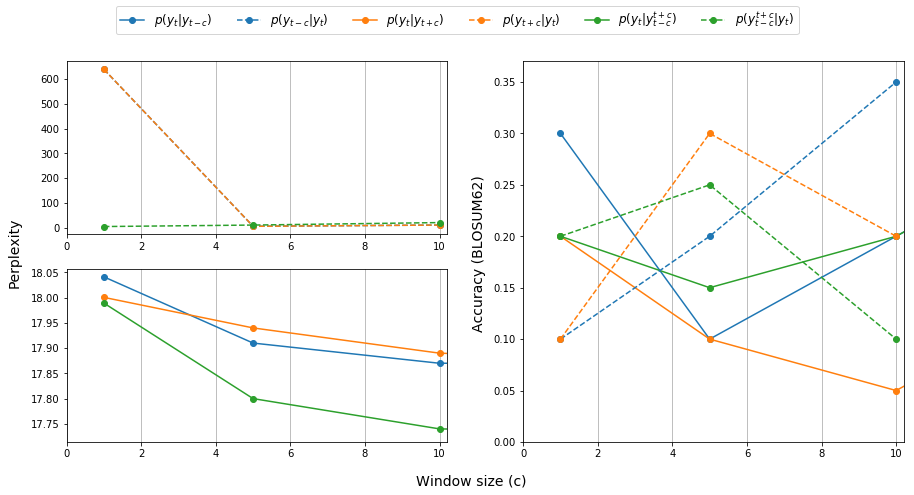

In [14]:
# Make grid of subplots
fig = plt.figure(figsize=(15,7))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax2 = plt.subplot2grid((2, 2), (1, 0))
ax3 = plt.subplot2grid((2, 2), (0, 1), rowspan=2)

### Plot on axis
# ax1 is Skip-gram perp
s_pre, s_post, s_both = ax1.plot(perp.loc[perp.model == 'SG'].ws, perp.loc[perp.model == 'SG'].pre, 'o--C0', 
                           perp.loc[perp.model == 'SG'].ws, perp.loc[perp.model == 'SG'].post, 'o--C1', 
                           perp.loc[perp.model == 'SG'].ws, perp.loc[perp.model == 'SG'].both, 'o--C2')

# ax2 is CBoW perp
c_pre, c_post, c_both = ax2.plot(perp.loc[perp.model == 'CBoW'].ws, perp.loc[perp.model == 'CBoW'].pre, 'o-C0', 
                           perp.loc[perp.model == 'CBoW'].ws, perp.loc[perp.model == 'CBoW'].post, 'o-C1', 
                           perp.loc[perp.model == 'CBoW'].ws, perp.loc[perp.model == 'CBoW'].both, 'o-C2')

# ax3 is accuracy
c_pre, c_post, c_both = ax3.plot(acc.loc[perp.model == 'CBoW'].ws, acc.loc[perp.model == 'CBoW'].pre, 'o-C0', 
                           acc.loc[perp.model == 'CBoW'].ws, acc.loc[perp.model == 'CBoW'].post, 'o-C1', 
                           acc.loc[perp.model == 'CBoW'].ws, acc.loc[perp.model == 'CBoW'].both, 'o-C2')
s_pre, s_post, s_both = ax3.plot(acc.loc[perp.model == 'SG'].ws, acc.loc[perp.model == 'SG'].pre, 'o--C0', 
                           acc.loc[perp.model == 'SG'].ws, acc.loc[perp.model == 'SG'].post, 'o--C1', 
                           acc.loc[perp.model == 'SG'].ws, acc.loc[perp.model == 'SG'].both, 'o--C2')

# Set axis grids
for ax in [ax1, ax2, ax3]: 
    ax.set_xlim(0,10.2)
    ax.grid(which='major', axis='x')
ax3.set_ylim(0, 0.37)
    
# Set axis labels
fig.text(0.07, 0.5, 'Perplexity', va='center', rotation='vertical', fontsize=14)
fig.text(0.5, 0.5, 'Accuracy (BLOSUM62)', va='center', rotation='vertical', fontsize=14)

# Overall figure settings
fig.text(0.5, 0.04, 'Window size (c)', ha='center', fontsize=14)
fig.legend(handles=[c_pre, s_pre, c_post, s_post, c_both, s_both], 
           loc='upper center', 
           labels=['$p(y_t|y_{t-c})$', '$p(y_{t-c}|y_t)$', 
                   '$p(y_t|y_{t+c})$', '$p(y_{t+c}|y_t)$', 
                   '$p(y_t|y_{t-c}^{t+c})$', '$p(y_{t-c}^{t+c}|y_t)$'], 
           ncol=6, fontsize=12)

# Save plot
plt.savefig(wkdir+'performances.pdf', dpi=1000)

# Legend types used in rest of the notebook

In [55]:
window_symbols = {1.0: 'o', 2.0: '*', 3.0: 'x', 4.0: 'D', 5.0: 's'}

window_legends = []
for window, marker in window_symbols.items():
    window_legends.append(
        mlines.Line2D([], [], color='black', marker=marker, linestyle='None', label="Window {:.0f}".format(window))
    )

data_colors = {'Train': 'red', 'Validation': 'blue', 'Test': 'green'}

color_legends = []
for name, color in data_colors.items():
    color_legends.append(mpatches.Patch(color=color, label=name))
    

direction_symbols = {'forward': 'o', 'backward': '*', '-': 'x'}
direction_legend = []
for direction, symbol in direction_symbols.items():
    direction_legend.append(
        mlines.Line2D([], [], color='black', marker=symbol, linestyle='None', label="Direction: %s" % direction)
    )

randomized_lines = {"False": '--', "True": '-', '-': ':'}
ramdomized_legend = []
for randomized, linestyle in randomized_lines.items():
    ramdomized_legend.append(
        mlines.Line2D([], [], color='black', marker='None', linestyle=linestyle, label="Randomized: %s" % randomized)
    )

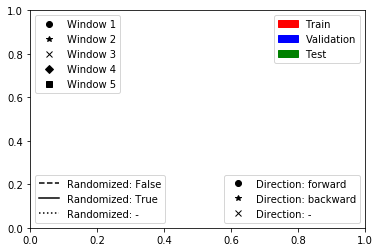

In [56]:
fig=plt.figure()
ax = fig.add_subplot(111)
leg1 = ax.legend(handles=color_legends, loc='upper right')
leg2 = ax.legend(handles=window_legends, loc='upper left')
leg3 = ax.legend(handles=direction_legend, loc="lower right")
leg4 = ax.legend(handles=ramdomized_legend, loc="lower left")

ax.add_artist(leg1)
ax.add_artist(leg2)
ax.add_artist(leg3)
plt.show()

# Baseline results

In [57]:
df_baseline = pd.read_excel(wkdir+'results_loss_perp_acc.xlsx', sheet_name='baseline')
# df_sg = pd.read_excel(wkdir+'results_loss_perp_acc.xlsx', sheet_name='skip-gram')
# df_cbow = pd.read_excel(wkdir+'results_loss_perp_acc.xlsx', sheet_name='cbow')

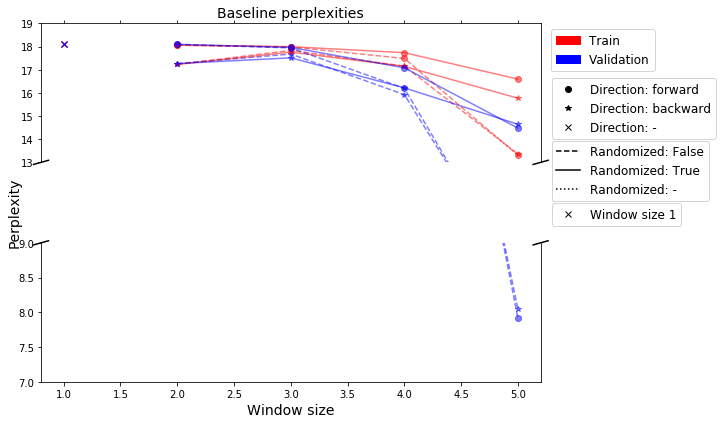

In [80]:
f, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,6))

for direction in np.unique(df_baseline.direction):
    for randomized in np.unique(df_baseline.randomized):
        df_filtered = df_baseline.loc[
            (df_baseline.direction == direction) &  
            (df_baseline.randomized == randomized)
        ]
        ax.plot(df_filtered.window, df_filtered["train perp"], 
                marker=direction_symbols[direction], 
                linestyle=randomized_lines[randomized],
                color=data_colors["Train"], 
                alpha=0.5)
        ax.plot(df_filtered.window, df_filtered["valid perp"], 
                marker=direction_symbols[direction], 
                linestyle=randomized_lines[randomized],
                c=data_colors["Validation"], alpha=0.5)
        
        ax2.plot(df_filtered.window, df_filtered["train perp"], 
                marker=direction_symbols[direction], 
                linestyle=randomized_lines[randomized],
                color=data_colors["Train"], 
                alpha=0.5)
        ax2.plot(df_filtered.window, df_filtered["valid perp"], 
                marker=direction_symbols[direction], 
                linestyle=randomized_lines[randomized],
                c=data_colors["Validation"], alpha=0.5)
# window size 1
ax.plot(1, 18.090, marker='x', linestyle='None', color=data_colors["Train"])
ax.plot(1, 18.126, marker='x', linestyle='None', color=data_colors["Validation"])

# set axis limits
ax.set_ylim(13, 19)
ax2.set_ylim(7, 9)

# legends
leg1 = ax.legend(handles=color_legends[:-1], bbox_to_anchor=(1.24, 1), fontsize=12)
leg2 = ax.legend(handles=direction_legend, bbox_to_anchor=(1.01, 0.65), fontsize=12)
leg3 = ax.legend(handles=ramdomized_legend, bbox_to_anchor=(1.01, 0.2), fontsize=12)
leg4 = ax.legend(
    handles=[mlines.Line2D([], [], marker='x', linestyle='None', color='black', label="Window size 1")],
    bbox_to_anchor=(1.01,-0.25), fontsize=12
)
ax.add_artist(leg1)
ax.add_artist(leg2)
ax.add_artist(leg3)

# beautify
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()

# broken lines on axes
d = .015
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes) 
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

ax.set_title("Baseline perplexities", size=14)
ax2.set_xlabel('Window size', fontsize=14)
f.text(0, 0.5, 'Perplexity', va='center', rotation='vertical', fontsize=14)

plt.tight_layout()
plt.savefig('../data/baseline_plot.png')
plt.show()

# tensorflow skip-gram results

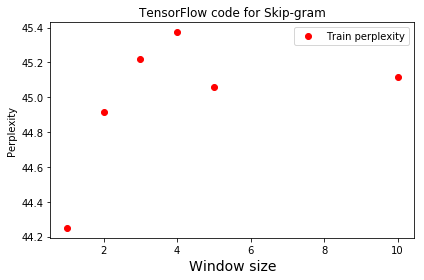

In [59]:
df_cnn = pd.read_excel(wkdir+'results_loss_perp_acc.xlsx', sheet_name='tensorflow')
df_cnn.plot(x="window", y="Train perplexity", c=data_colors["Train"], marker='o', linestyle="None")
plt.xlabel("Window size", fontsize=14)
plt.ylabel("Perplexity")
plt.title("TensorFlow code for Skip-gram")
plt.tight_layout()
plt.savefig("../data/skipgram_tf.png")

# CNN results visualized

In [60]:
df_cnn = pd.read_excel(wkdir+'results_loss_perp_acc.xlsx', sheet_name='cnn')
df_cnn = df_cnn.dropna(how='all')

## Best perplexities for test

In [61]:
idx = df_cnn.groupby(['Window'])['Test Perplexity'].transform(min) == df_cnn['Test Perplexity']
df_cnn_1 = df_cnn[idx]#.drop(20, axis=0)

In [62]:
df_cnn_1

,Window,Direction,Embedding origin,Embedding dim,Learning rate,Epochs,Conv2d_in,Conv2d_out,Conv layers,Kernel size,Stride,p_dropout,Train Perplexity,Train Accuracy,Val Perplexity,Val Accuracy,Test Perplexity,Test acc
20,1.0,both,new,2.0,0.1,20.0,1.0,100.0,1.0,2,1.0,0.0,17.713,0.104,17.764,0.104,17.737,0.104
43,2.0,both,new,2.0,0.1,20.0,1.0,100.0,1.0,4,1.0,0.0,17.516,0.110,17.574,0.108,17.544,0.109
65,3.0,both,new,2.0,0.1,20.0,1.0,100.0,1.0,6,1.0,0.0,17.318,0.115,17.361,0.115,17.340,0.115
83,4.0,both,new,2.0,0.1,20.0,1.0,100.0,1.0,8,1.0,0.0,17.215,0.118,17.283,0.117,17.242,0.118
100,5.0,both,new,2.0,0.1,20.0,1.0,100.0,1.0,10,1.0,0.0,17.121,0.120,17.180,0.119,17.146,0.120


C:\Users\hmmar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


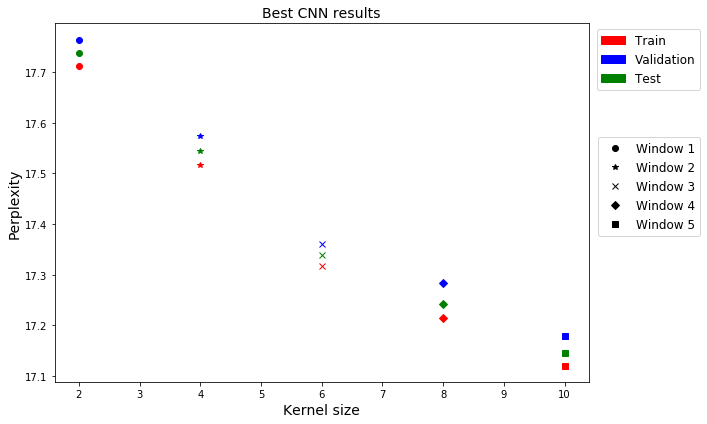

In [63]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

for window, marker in window_symbols.items():
    df_cnn_filter = df_cnn_1[(df_cnn.Window == window) & (df_cnn["Kernel size"] == window*2)]
    ax.plot(df_cnn_filter['Kernel size'], df_cnn_filter['Train Perplexity'], marker, color=data_colors['Train'], label="Train")
    ax.plot(df_cnn_filter['Kernel size'], df_cnn_filter['Val Perplexity'], marker, color=data_colors['Validation'], label="Validation")
    ax.plot(df_cnn_filter['Kernel size'], df_cnn_filter['Test Perplexity'], marker, color=data_colors['Test'], label="Test")

plt.xlabel('Kernel size', fontsize=14)
plt.ylabel('Perplexity', fontsize=14)
leg1=plt.legend(handles=color_legends, bbox_to_anchor=(1.22, 1), fontsize=12)
leg2=plt.legend(handles=window_legends, bbox_to_anchor=(1.22, 0.7), fontsize=12)
ax.add_artist(leg1)
plt.title("Best CNN results", fontsize=14)
plt.tight_layout()
plt.savefig('../data/cnn_best.png')
plt.show()

## Effect of dropout probability on perplexity

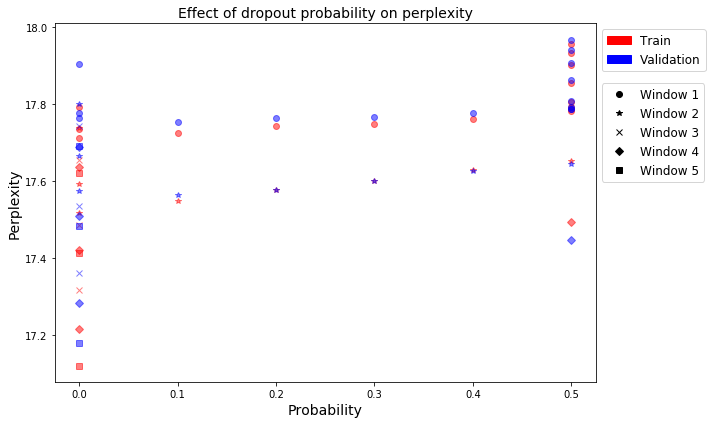

In [64]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

for window, marker in window_symbols.items():
    df_cnn_filter = df_cnn[(df_cnn.Window == window) & (df_cnn["Kernel size"] == window*2)]
    
    ax.plot(df_cnn_filter['p_dropout'], df_cnn_filter['Train Perplexity'], marker, color=data_colors['Train'], alpha=0.5)
    ax.plot(df_cnn_filter['p_dropout'], df_cnn_filter['Val Perplexity'], marker, color=data_colors['Validation'], alpha=0.5)

plt.xlabel('Probability', fontsize=14)
plt.ylabel('Perplexity', fontsize=14)
plt.title("Effect of dropout probability on perplexity", fontsize=14)
leg1=plt.legend(handles=color_legends[:-1], bbox_to_anchor=(1, 1), fontsize=12)
leg2=plt.legend(handles=window_legends, bbox_to_anchor=(1, 0.85), fontsize=12)
ax.add_artist(leg1)
plt.tight_layout()
plt.savefig('../data/cnn_dropout.png')
plt.show()

## Number of convolutional layers and the effect on perplexity

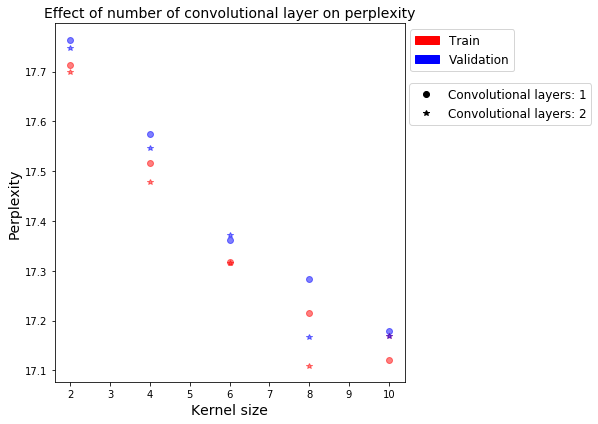

In [78]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

conv_layers = {1: 'o', 2: '*'}
conv_legend = []
for nlayers, symbol in conv_layers.items():
    conv_legend.append(
        mlines.Line2D([], [], color='black', marker=symbol, linestyle='None', label="Convolutional layers: %s" % nlayers)
    )

for nlayers, marker in window_symbols.items():
    df_filter = df_cnn.loc[
        (df_cnn["Conv layers"] == nlayers) & 
        (df_cnn.p_dropout == 0.0) &
        (df_cnn["Embedding origin"] == 'new')
    ]
    
    ax.plot(df_filter.Window * 2, df_filter["Train Perplexity"], marker, c=data_colors["Train"], alpha=0.5)
    ax.plot(df_filter.Window * 2, df_filter["Val Perplexity"], marker, c=data_colors["Validation"], alpha=0.5)

leg1=plt.legend(handles=color_legends[:-1], bbox_to_anchor=(1.33, 1), fontsize=12)
leg2=plt.legend(handles=conv_legend, bbox_to_anchor=(1.55, 0.85), fontsize=12)
ax.add_artist(leg1)
plt.xlabel("Kernel size", fontsize=14)
plt.ylabel("Perplexity", fontsize=14)
plt.title("Effect of number of convolutional layer on perplexity", fontsize=14)
plt.tight_layout()
plt.savefig('../data/cnn_layers.png')
plt.show()

## To use or not to use pretrained embeddings

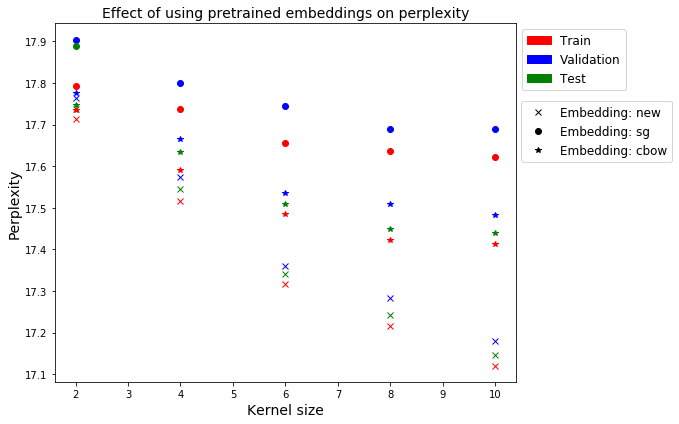

In [79]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

emb_symbols = {'new': 'x', 'sg': 'o', 'cbow': '*'}
emb_legend = []
for emb, symbol in emb_symbols.items():
    emb_legend.append(
        mlines.Line2D([], [], color='black', marker=symbol, linestyle='None', label="Embedding: %s" % emb)
    )

for emb, marker in emb_symbols.items():
    df_filter = df_cnn.loc[
        (df_cnn.p_dropout == 0) & 
        (df_cnn["Conv layers"] == 1) &
        (df_cnn["Embedding origin"] == emb)
    ]
    
    ax.plot(df_filter["Kernel size"], df_filter["Train Perplexity"], marker, color=data_colors["Train"])
    ax.plot(df_filter["Kernel size"], df_filter["Val Perplexity"], marker, color=data_colors["Validation"])
    ax.plot(df_filter["Kernel size"], df_filter["Test Perplexity"], marker, color=data_colors["Test"])

leg1=plt.legend(handles=color_legends, bbox_to_anchor=(1.25, 1), fontsize=12)
leg2=plt.legend(handles=emb_legend, bbox_to_anchor=(1.35, 0.8), fontsize=12)
ax.add_artist(leg1)

plt.xlabel("Kernel size", fontsize=14)
plt.ylabel("Perplexity", fontsize=14)
plt.title("Effect of using pretrained embeddings on perplexity", fontsize=14)

plt.tight_layout()
plt.savefig('../data/cnn_embedding.png')
plt.show()